# Предсказание курса биткойна

На основании исторических данных из открытого источника требуется предсказать курс биткойна на следующий день, на неделю, на определенный период времени.

## Описание данных

Собраны исторические данные за период с января 2012 года по март 2019 года. 

Датасет состоит из 2652 строк и 8 столбцов 

Источник данных https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data 


## Загрузка и знакомство с данными

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, max_error, r2_score

In [2]:
data = pd.read_csv('BTCUSD_daily.csv', index_col=0, parse_dates=['date'])
display(data)

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.220000,225.00,215.40,220.610000,6.493501e+06,29625.030000
1,2015-02-10,BTC/USD,220.610000,223.88,214.00,220.960000,6.402351e+06,29268.950000
2,2015-02-11,BTC/USD,220.960000,224.40,218.10,219.190000,4.268987e+06,19289.280000
3,2015-02-12,BTC/USD,219.190000,223.20,217.87,222.600000,2.468883e+06,11190.650000
4,2015-02-13,BTC/USD,222.390000,241.76,221.46,236.000000,6.806973e+06,29079.110000
...,...,...,...,...,...,...,...,...
2647,2022-05-10,BTC/USD,30136.000000,32687.00,29833.00,31072.000000,4.403736e+08,14172.682208
2648,2022-05-11,BTC/USD,31065.327593,32227.00,27900.00,29149.000000,8.374498e+08,28729.965053
2649,2022-05-12,BTC/USD,29149.693567,30270.00,26591.00,29078.000000,9.959625e+08,34251.410507
2650,2022-05-13,BTC/USD,29089.000000,31136.00,28826.00,29305.000000,2.556194e+08,8722.724600


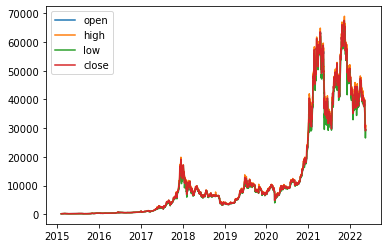

In [3]:
plt.plot(data['date'], data['open'], label='open')
plt.plot(data['date'], data['high'], label='high')
plt.plot(data['date'], data['low'], label='low')
plt.plot(data['date'], data['close'], label='close')
plt.legend()

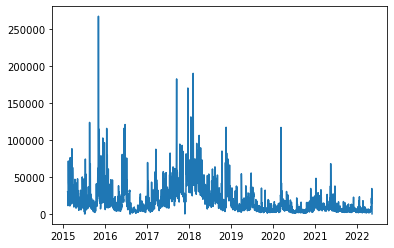

In [4]:
plt.plot(data['date'], data['Volume BTC'], label='Volume BTC')

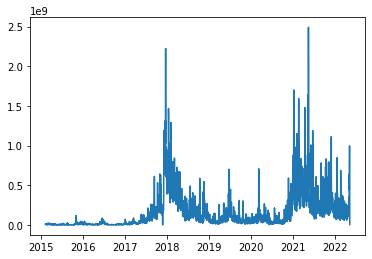

In [5]:
plt.plot(data['date'], data['Volume USD'], label='Volume USD')

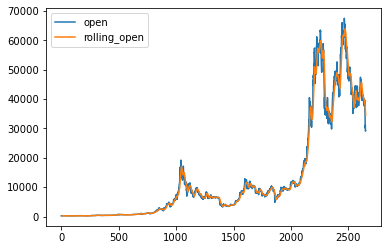

In [6]:
plt.plot(data['open'], label='open')
plt.plot(data['open'].rolling(window=14).mean(), label='rolling_open')
plt.legend()

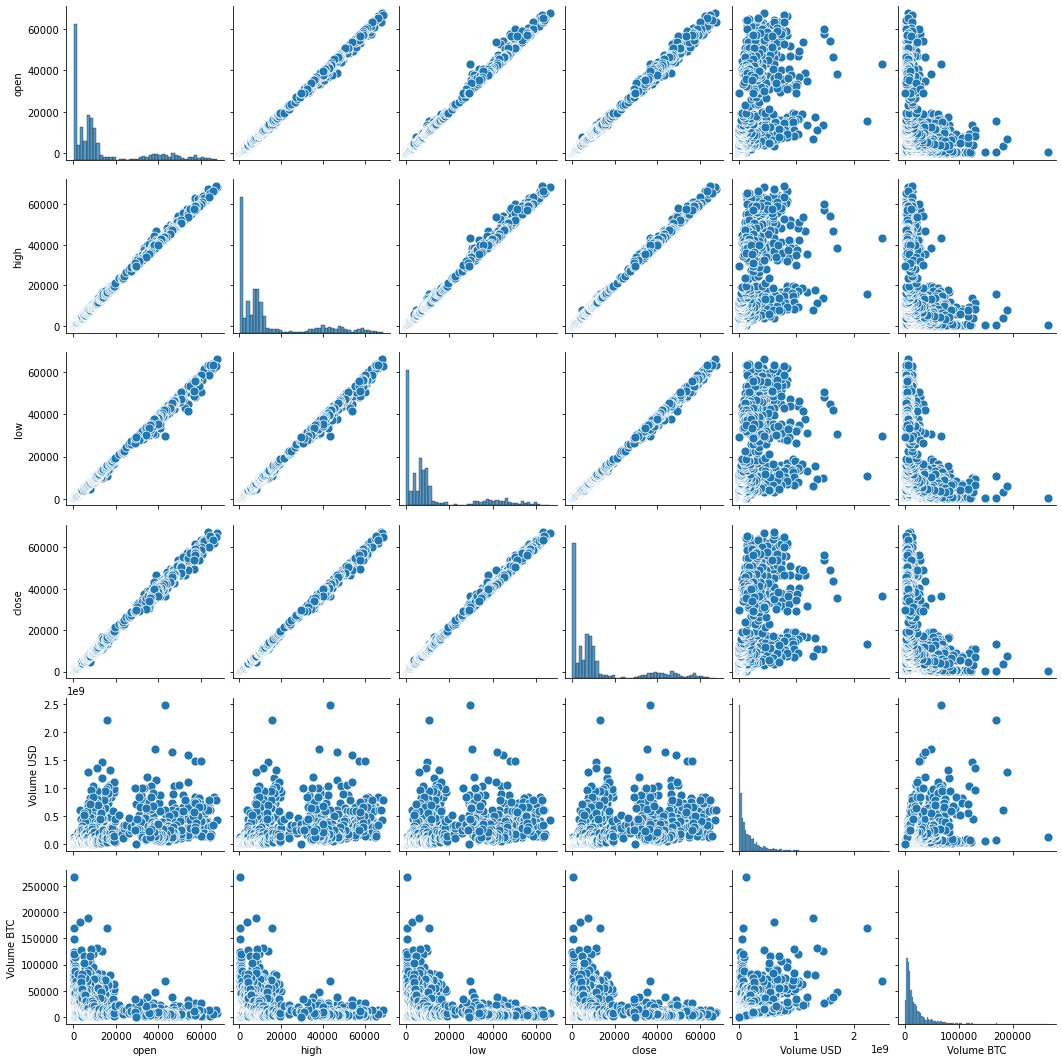

In [7]:
sns.pairplot(data, kind="scatter", plot_kws=dict(s=80, edgecolor="white"))
plt.show()

## Добавление признаков

In [8]:
data['open_mean_14d'] = data['open'].rolling(window=14, closed='left').mean()
data['open_mean_30d'] = data['open'].rolling(window=30, closed='left').mean()
data['close_min_7d'] = data['open'].rolling(window=7, closed='left').min()
data['close_max_7d'] = data['open'].rolling(window=7, closed='left').max()
display(data)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,open_mean_30d,close_min_7d,close_max_7d
0,2015-02-09,BTC/USD,224.220000,225.00,215.40,220.610000,6.493501e+06,29625.030000,NaN,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.610000,223.88,214.00,220.960000,6.402351e+06,29268.950000,NaN,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.960000,224.40,218.10,219.190000,4.268987e+06,19289.280000,NaN,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.190000,223.20,217.87,222.600000,2.468883e+06,11190.650000,NaN,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.390000,241.76,221.46,236.000000,6.806973e+06,29079.110000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2022-05-10,BTC/USD,30136.000000,32687.00,29833.00,31072.000000,4.403736e+08,14172.682208,37897.451665,39327.698519,34075.000000,39708.119617
2648,2022-05-11,BTC/USD,31065.327593,32227.00,27900.00,29149.000000,8.374498e+08,28729.965053,37160.139742,38906.229191,30136.000000,39708.119617
2649,2022-05-12,BTC/USD,29149.693567,30270.00,26591.00,29078.000000,9.959625e+08,34251.410507,36655.305999,38535.706777,30136.000000,39708.119617
2650,2022-05-13,BTC/USD,29089.000000,31136.00,28826.00,29305.000000,2.556194e+08,8722.724600,35933.040152,38188.690628,29149.693567,36577.000000


In [9]:
for day in range(1,8):
    data[f"close_day_{day}"] = data['close'].shift(day)
data['weekday'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
display(data)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,open_mean_30d,...,close_day_1,close_day_2,close_day_3,close_day_4,close_day_5,close_day_6,close_day_7,weekday,month,year
0,2015-02-09,BTC/USD,224.220000,225.00,215.40,220.610000,6.493501e+06,29625.030000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2015
1,2015-02-10,BTC/USD,220.610000,223.88,214.00,220.960000,6.402351e+06,29268.950000,NaN,NaN,...,220.61,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2015
2,2015-02-11,BTC/USD,220.960000,224.40,218.10,219.190000,4.268987e+06,19289.280000,NaN,NaN,...,220.96,220.61,NaN,NaN,NaN,NaN,NaN,2,2,2015
3,2015-02-12,BTC/USD,219.190000,223.20,217.87,222.600000,2.468883e+06,11190.650000,NaN,NaN,...,219.19,220.96,220.61,NaN,NaN,NaN,NaN,3,2,2015
4,2015-02-13,BTC/USD,222.390000,241.76,221.46,236.000000,6.806973e+06,29079.110000,NaN,NaN,...,222.60,219.19,220.96,220.61,NaN,NaN,NaN,4,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2022-05-10,BTC/USD,30136.000000,32687.00,29833.00,31072.000000,4.403736e+08,14172.682208,37897.451665,39327.698519,...,30140.00,34064.00,35506.00,36040.00,36577.0,39708.119617,37752.000000,1,5,2022
2648,2022-05-11,BTC/USD,31065.327593,32227.00,27900.00,29149.000000,8.374498e+08,28729.965053,37160.139742,38906.229191,...,31072.00,30140.00,34064.00,35506.00,36040.0,36577.000000,39708.119617,2,5,2022
2649,2022-05-12,BTC/USD,29149.693567,30270.00,26591.00,29078.000000,9.959625e+08,34251.410507,36655.305999,38535.706777,...,29149.00,31072.00,30140.00,34064.00,35506.0,36040.000000,36577.000000,3,5,2022
2650,2022-05-13,BTC/USD,29089.000000,31136.00,28826.00,29305.000000,2.556194e+08,8722.724600,35933.040152,38188.690628,...,29078.00,29149.00,31072.00,30140.00,34064.0,35506.000000,36040.000000,4,5,2022


In [10]:
data = data.fillna(method='backfill')
data.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,open_mean_30d,...,close_day_1,close_day_2,close_day_3,close_day_4,close_day_5,close_day_6,close_day_7,weekday,month,year
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,234.401429,249.162,...,220.61,220.61,220.61,220.61,220.61,220.61,220.61,0,2,2015
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,234.401429,249.162,...,220.61,220.61,220.61,220.61,220.61,220.61,220.61,1,2,2015
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,234.401429,249.162,...,220.96,220.61,220.61,220.61,220.61,220.61,220.61,2,2,2015
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,234.401429,249.162,...,219.19,220.96,220.61,220.61,220.61,220.61,220.61,3,2,2015
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,234.401429,249.162,...,222.60,219.19,220.96,220.61,220.61,220.61,220.61,4,2,2015


In [11]:
data['target']=data['close'].shift(-1)
data.head()

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_mean_14d,open_mean_30d,...,close_day_2,close_day_3,close_day_4,close_day_5,close_day_6,close_day_7,weekday,month,year,target
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,234.401429,249.162,...,220.61,220.61,220.61,220.61,220.61,220.61,0,2,2015,220.96
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,234.401429,249.162,...,220.61,220.61,220.61,220.61,220.61,220.61,1,2,2015,219.19
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,234.401429,249.162,...,220.61,220.61,220.61,220.61,220.61,220.61,2,2,2015,222.60
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,234.401429,249.162,...,220.96,220.61,220.61,220.61,220.61,220.61,3,2,2015,236.00
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,234.401429,249.162,...,219.19,220.96,220.61,220.61,220.61,220.61,4,2,2015,258.12


In [12]:
data[['close', 'target']]

,close,target
0,220.610000,220.960000
1,220.960000,219.190000
2,219.190000,222.600000
3,222.600000,236.000000
4,236.000000,258.120000
...,...,...
2647,31072.000000,29149.000000
2648,29149.000000,29078.000000
2649,29078.000000,29305.000000
2650,29305.000000,29527.874655


In [13]:
data['high_low'] = data['high'] - data['low']

## Обучающая и тестовая выборки

In [14]:
X = data[:-1].drop(['symbol', 'date', 'target'], axis=1)
y = data[:-1]['target']

print(X.shape)
print(y.shape)

(2651, 21)
(2651,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1855, 21)
(796, 21)
(1855,)
(796,)


## Обучение моделей

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
maxe = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE =', mae)
print('MAX_ERROR =', maxe)
print('R2 =', r2)

MAE = 407.60788414161857
MAX_ERROR = 6447.70787211362
R2 = 0.9970819548034844


In [17]:
model.coef_

array([ 2.76807796e-01, -4.57066424e-02, -3.81888976e-02,  1.00384342e+00,
       -9.10867791e-08,  5.66309481e-04, -1.82764599e-02, -8.58594767e-03,
        9.94537469e-03,  2.96620928e-02, -1.71318502e-01, -2.34651692e-02,
        8.68118151e-03, -6.40945274e-03,  2.59690338e-02, -1.20738467e-01,
        7.35080486e-02,  4.86092279e+00,  3.46029447e-02,  2.98481922e+01,
       -7.51774477e-03])

In [18]:
forest = RandomForestRegressor(n_estimators=200, max_depth=16, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
maxe = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE =', mae)
print('MAX_ERROR =', maxe)
print('R2 =', r2)

MAE = 444.80284147067533
MAX_ERROR = 7747.173633492617
R2 = 0.9964125739974372


In [19]:
forest.feature_importances_

array([2.40608666e-02, 7.72046798e-02, 2.84763181e-02, 1.87735720e-01,
       6.78625868e-05, 6.65573536e-05, 1.50381535e-01, 1.15135166e-01,
       1.01593406e-01, 8.38870251e-02, 2.16096376e-02, 1.86884403e-02,
       5.01410282e-03, 1.43229592e-04, 4.85428364e-02, 3.10414739e-02,
       1.06089971e-01, 1.06883612e-04, 4.85393622e-05, 1.34656298e-05,
       9.22842903e-05])

In [24]:
pd.DataFrame(data=[model.coef_], columns=X.columns).T.sort_values(0, ascending=False)

,0
year,2.984819e+01
weekday,4.860923e+00
close,1.003843e+00
open,2.768078e-01
close_day_7,7.350805e-02
month,3.460294e-02
close_max_7d,2.966209e-02
close_day_5,2.596903e-02
close_min_7d,9.945375e-03
close_day_3,8.681182e-03


In [25]:
pd.DataFrame(data=[forest.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)

,0
close,0.187736
open_mean_14d,0.150382
open_mean_30d,0.115135
close_day_7,0.106090
close_min_7d,0.101593
close_max_7d,0.083887
high,0.077205
close_day_5,0.048543
close_day_6,0.031041
low,0.028476


In [35]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators':[50, 100, 200], 
    'max_depth':[5,10,15]
    #'criterion': ['squared_error', 'absolute_error', 'poisson']
} 

gs = GridSearchCV(model, param_grid, scoring='neg_median_absolute_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_median_absolute_error')

In [36]:
 gs.best_score_

-95.92562006268656

In [37]:
gs.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [39]:
best_model = gs.best_estimator_

In [40]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
maxe = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE =', mae)
print('MAX_ERROR =', maxe)
print('R2 =', r2)

MAE = 443.965539031815
MAX_ERROR = 7739.7762732190895
R2 = 0.9963891348598208


## Выводы

Были обучены две модели: 


**Random Forest Regression**

При переборе небольшого количества гиперпараметров была определена лучшая модель случайного леса с глубиной 15 и количеством деревьев 200, при этих параметрах были достигнуты следующие результаты:

    MAE = 443.965539031815
    MAX_ERROR = 7739.7762732190895
    R2 = 0.9963891348598208

**Linear Regression** 

    MAE = 407.60788414161857
    MAX_ERROR = 6447.70787211362
    R2 = 0.9970819548034844

Линейная регрессия показала результаты лучше, чем случайный лес, следовательно, останавливаемся на ней.